In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
import pickle

from EnvLibs import Environment, RewardKernel, TrafficGenerator

In [2]:
def runSimulation(mdpKernel, params, trafficGenerator, num_epochs=1000):
    """
    Run simulation with a given policy function
    
    Args:
        policy_func: Function that takes (u, params) and returns (w, r, M, alpha) as action
        params: Dictionary of parameters
        num_epochs: Number of simulation epochs (default: 1000)
    
    Returns:
        rewardRecord: List of rewards for each epoch
    """
    env = Environment(params, trafficGenerator)
    rewardRecord = []
    alphaRecord = []
    for epoch in range(num_epochs):
        #u = env.updateStates() # Generate the data from Markov model
        u = env.trafficGenerator.updateReadTraffic() # Generate the data from real dataset
        (w, r, M, alpha) = mdpKernel.getActionFromObervation(u)
        reward = env.applyActions(np.array(w), np.array(r), M, alpha)
        rewardRecord.append(reward)
        alphaRecord.append(alpha)
    
    return rewardRecord, alphaRecord, env

MDP Parameters:
  N_user: 4
  LEN_window: 10
  r_bar: 4
  B: 40
  M_list: [2, 3]
  randomSeed: 999
  alphaList: [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
  N_aggregation: 4
avgPacketLossRate_mdp: 0.005575560459983727


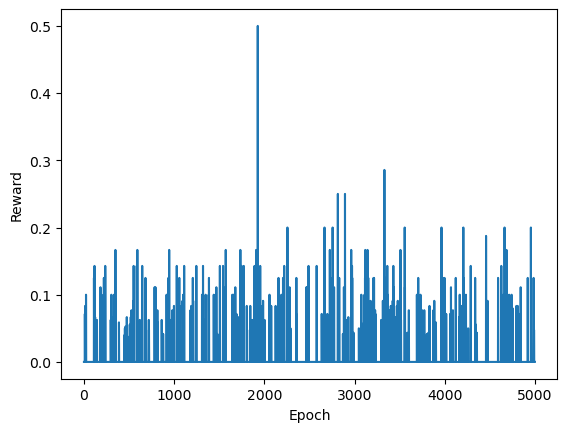

In [3]:
with open('Results/mdpKernel.pkl', 'rb') as f:
    mdpKernel = pickle.load(f)
with open('Results/params.pkl', 'rb') as f:
    params = pickle.load(f)
with open('Results/TrafficData/trafficData.pkl', 'rb') as f:
    trafficData = pickle.load(f)

print("MDP Parameters:")
for key, value in params.items():
    print(f"  {key}: {value}")

trafficGenerator = TrafficGenerator(params)
trafficGenerator.registerDataset(trafficData['traffic'])

num_epochs = 5000
rewardRecord_mdp, alphaRecord_mdp, env_mdp = runSimulation(mdpKernel, params, trafficGenerator, num_epochs=num_epochs)
avgPacketLossRate_mdp = env_mdp.getPacketLossRate()
print(f"avgPacketLossRate_mdp: {avgPacketLossRate_mdp}")


plt.plot(rewardRecord_mdp)
plt.xlabel("Epoch")
plt.ylabel("Reward")
plt.show()